## Probability Density Function and Gaussian Error 

In this tutorial, we will learn the following probability density functions and gaussian error in linear regression:
1. Probability Density Function (pdf) of Gaussian distribution
2. Probability Density Function (pdf) of Chi-Square distribution
3. Probability Density Function (pdf) of t-distribution
4. Probability Density Function (pdf) of F-distribution
5. Gaussian Errors in Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
import abc
from abc import ABC

In [2]:
class prob(ABC):
    
    def __init__(self):
        print("*"*70)
        print("Probability Disitrbution Functions")
        print("*"*70)
        print("\n")
    
    @abc.abstractmethod
    def normal_pdf():
        pass
    
    @abc.abstractmethod
    def chi_square_pdf():
        pass
    
    @abc.abstractmethod
    def t_pdf():
        pass
    
    @abc.abstractmethod
    def f_pdf():
        pass
    
    @abc.abstractmethod
    def univar_linreg_gauss_error():
        pass


In [3]:
class pdf(prob):
    
    def __init__(self):
        super().__init__()        

    def normal_pdf(self,x_lower,x_upper,num=200):
        x = np.linspace(start = x_lower, stop = x_upper, num = num)
        plt.figure(figsize = (10, 8))
        plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color = "black", label = "$\\mu=0$, $\sigma =1$")
        plt.plot(x, norm.pdf(x, loc = 1, scale = 1.5), color = "red", label = "$\\mu=1$, $\sigma =1.5$")
        plt.plot(x, norm.pdf(x, loc = -1, scale = 0.5), color = "blue", label = "$\\mu=-1$, $\sigma =0.5$")
        plt.title("Probability density function of $N(\\mu, \\sigma^2)$",fontweight="bold")
        plt.ylabel("Density",fontweight="bold")
        plt.legend()
        plt.show()


    def chi_square_pdf(self,x_lower,x_upper,num=200):
        x = np.linspace(start = x_lower, stop = x_upper, num = num)
        plt.figure(figsize = (10, 8))
        plt.plot(x, chi2.pdf(x, df = 1), color = "black", label = "k = 1")
        for i in range(2, 7):
            plt.plot(x, chi2.pdf(x, df = i), label = "k = " + str(i))
            plt.ylim((0, 0.6))    
            plt.title("Probability density function of $\\chi^2_k$",fontweight="bold")
            plt.ylabel("Density",fontweight="bold")
            plt.legend()
        plt.show()


    def t_pdf(self,x_lower,x_upper,num=200):
        x = np.linspace(start = x_lower, stop = x_upper, num = num)
        plt.figure(num = 2, figsize = (10, 8))
        for i in range(0, 5):
            plt.plot(x, t.pdf(x, df = [1, 2, 3, 5, 100][i]), label = "k = " + str([1, 2, 3, 5, 100][i]))
        plt.ylim((0, 0.4))    
        plt.title("Probability density function of $t_k$",fontweight="bold")
        plt.ylabel("Density",fontweight="bold")
        plt.legend()
        plt.show()

    def f_pdf(self,x_lower,x_upper,num=200):
        x = np.linspace(start = x_lower, stop = x_upper, num = num)
        plt.figure(num = 3, figsize = (10, 8))
        plt.plot(x, f.pdf(x, dfn = 1, dfd = 1), label = "$k_1 = 1$, $k_2 = 1$")
        plt.plot(x, f.pdf(x, dfn = 3, dfd = 2), label = "$k_1 = 3$, $k_2 = 2$")
        plt.plot(x, f.pdf(x, dfn = 2, dfd = 3), linestyle = "--", label = "$k_1 = 2$, $k_2 = 3$")
        plt.plot(x, f.pdf(x, dfn = 6, dfd = 3), label = "$k_1 = 6$, $k_2 = 3$")
        plt.plot(x, f.pdf(x, dfn = 3, dfd = 6), linestyle = "--", label = "$k_1 = 3$, $k_2 = 6$")
        plt.plot(x, f.pdf(x, dfn = 100, dfd = 100), label = "$k_1 = 100$, $k_2 = 100$")
        plt.ylim((0, 2.1))    
        plt.title("Probability density function of $F_{k_1, k_2}$",fontweight="bold")
        plt.ylabel("Density",fontweight="bold")
        plt.legend()
        plt.show() 
    
    def univar_linreg_gauss_error(self):
        np.random.seed(123)
        N = 200
        beta_0 = 1
        beta_1 = 0.5
        e_sd = 0.5
        x = np.linspace(start = -10, stop = 10, num = N)
        e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
        y = beta_0 + beta_1 * x + e
        y_cond_exp = beta_0 + beta_1 * x
        # Fit the data
        #y_mdl = sm.OLS(y, sm.add_constant(x)).fit()
        # Plot the density
        plot_at = [-5, 0, 5]
    
        def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
            values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate density for this interval
            # Y|X ~ Normal(XB, sigma^2)
            # (Y - XB)|X ~ Normal(0, sigma^2)
            dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
            x = where_x + dens * np.array(magnify)
            y = where_y + values
            return(np.vstack((x, y)))

        plt.figure(num = 4, figsize = (10, 8))
        plt.plot(x, y, linestyle = "None", marker = "o", color = "red", markerfacecolor = 'None')
        plt.title("Linear Regression with Gaussian Errors",fontweight="bold")         
        #plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
        plt.plot(x, y_cond_exp, linestyle = "-", color = "blue", label = "$E(Y_i|X_i) = \\beta_0 + \\beta_1 X_i$")
        for i in range(0, len(plot_at)):
            # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
            y_fit = beta_0 + beta_1 * plot_at[i]
            xy = sideways_dnorm(where_x = plot_at[i],where_y = y_fit,e_var = e_sd**2)
            plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
            plt.hlines(y_fit,min(x),max(x),colors = "black",linestyles = "--")
            #plt.hlines()
            plt.vlines(x = plot_at[i], linestyles = "--", colors = "black", ymin = min(y), ymax = max(y))
            plt.plot(plot_at[i], y_fit, linestyle = "None", marker = "o", color = "darkgreen")
            plt.legend()
        plt.show()


**********************************************************************
Probability Disitrbution Functions
**********************************************************************




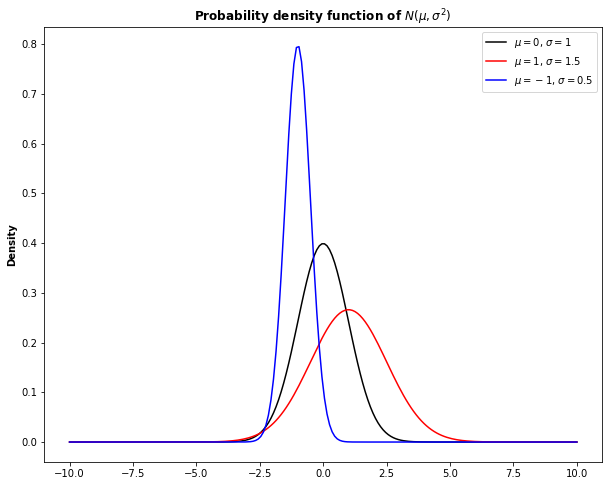

In [4]:
a = pdf()
a.normal_pdf(-10,10)

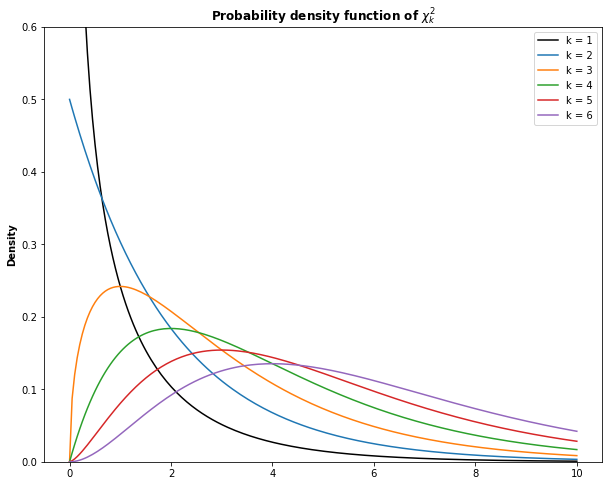

In [5]:
a.chi_square_pdf(0,10)

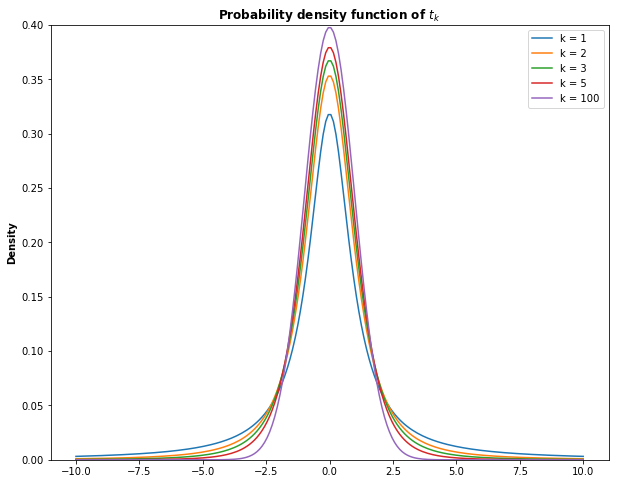

In [6]:
a.t_pdf(-10,10)

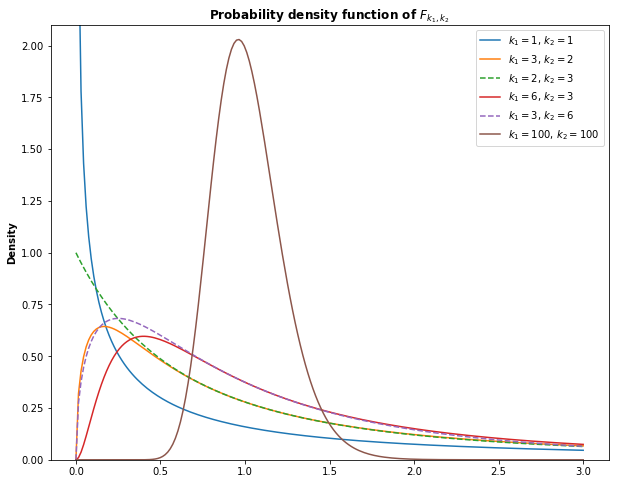

In [7]:
a.f_pdf(1e-10,3)

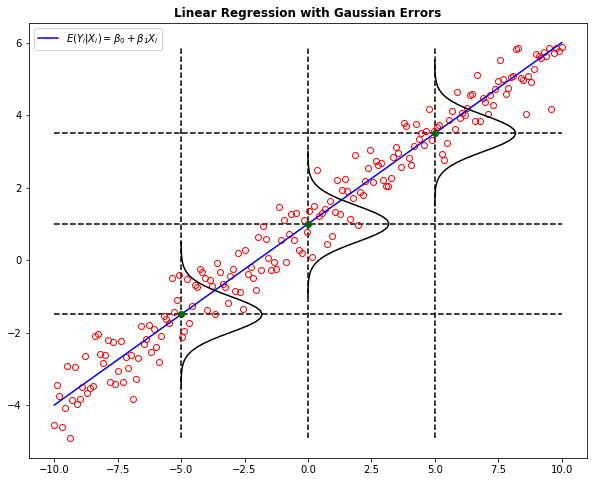

In [8]:
a.univar_linreg_gauss_error()